In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from matplotlib.colors import LogNorm

In [5]:
feature_names = []
with open('C:/Users/syc/Desktop/Data Science App/ML 207/coursework-master/Data//mushroom.map') as fmap:
    for line in fmap:
        [index, name, junk] = line.split()
        feature_names.append(name)

print('Loaded feature names: %d' %len(feature_names))

Loaded feature names: 126


In [6]:
X, Y = [], []

with open('C:/Users/syc/Desktop/Data Science App/ML 207/coursework-master/Data//mushroom.data') as fdata:
    for line in fdata:
        items = line.split()
        Y.append(int(items.pop(0)))
        x = np.zeros(len(feature_names))
        for item in items:
            feature = int(item.split(':')[0])
            x[feature] = 1
        X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print(train_data.shape, test_data.shape)

(7000, 126) (1124, 126)


In [7]:
### P1 ###
def P1(components):
    pca = PCA(n_components=components)
    pca.fit(train_data)
    total = 0
    for k in range(0, components):
        total += pca.explained_variance_ratio_[k]
        print("Variance explained by first %d principle components: %.4f" % (k + 1, total))
P1(50)

Variance explained by first 1 principle components: 0.1640
Variance explained by first 2 principle components: 0.2973
Variance explained by first 3 principle components: 0.3990
Variance explained by first 4 principle components: 0.4696
Variance explained by first 5 principle components: 0.5083
Variance explained by first 6 principle components: 0.5451
Variance explained by first 7 principle components: 0.5764
Variance explained by first 8 principle components: 0.6037
Variance explained by first 9 principle components: 0.6299
Variance explained by first 10 principle components: 0.6522
Variance explained by first 11 principle components: 0.6727
Variance explained by first 12 principle components: 0.6914
Variance explained by first 13 principle components: 0.7087
Variance explained by first 14 principle components: 0.7256
Variance explained by first 15 principle components: 0.7408
Variance explained by first 16 principle components: 0.7558
Variance explained by first 17 principle componen

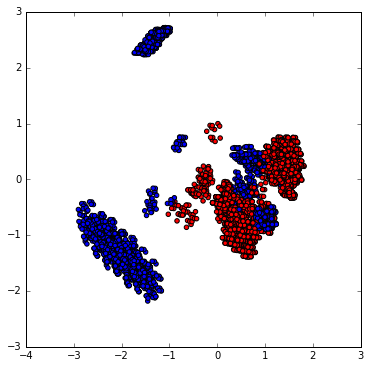

In [11]:
### P2 ###
from matplotlib.colors import ListedColormap
def P2(components):
### STUDENT START ###
    
    pca = PCA(n_components = components)
    pca.fit(train_data)
    T_train_data = pca.transform(train_data)
    
    cm_bright = ListedColormap(['red', 'blue'])
    plt.figure(figsize=(6,6))
    plt.scatter(T_train_data[:, 0], T_train_data[:, 1], c=train_labels, cmap=cm_bright)
    
  
### STUDENT END ###
P2(2)

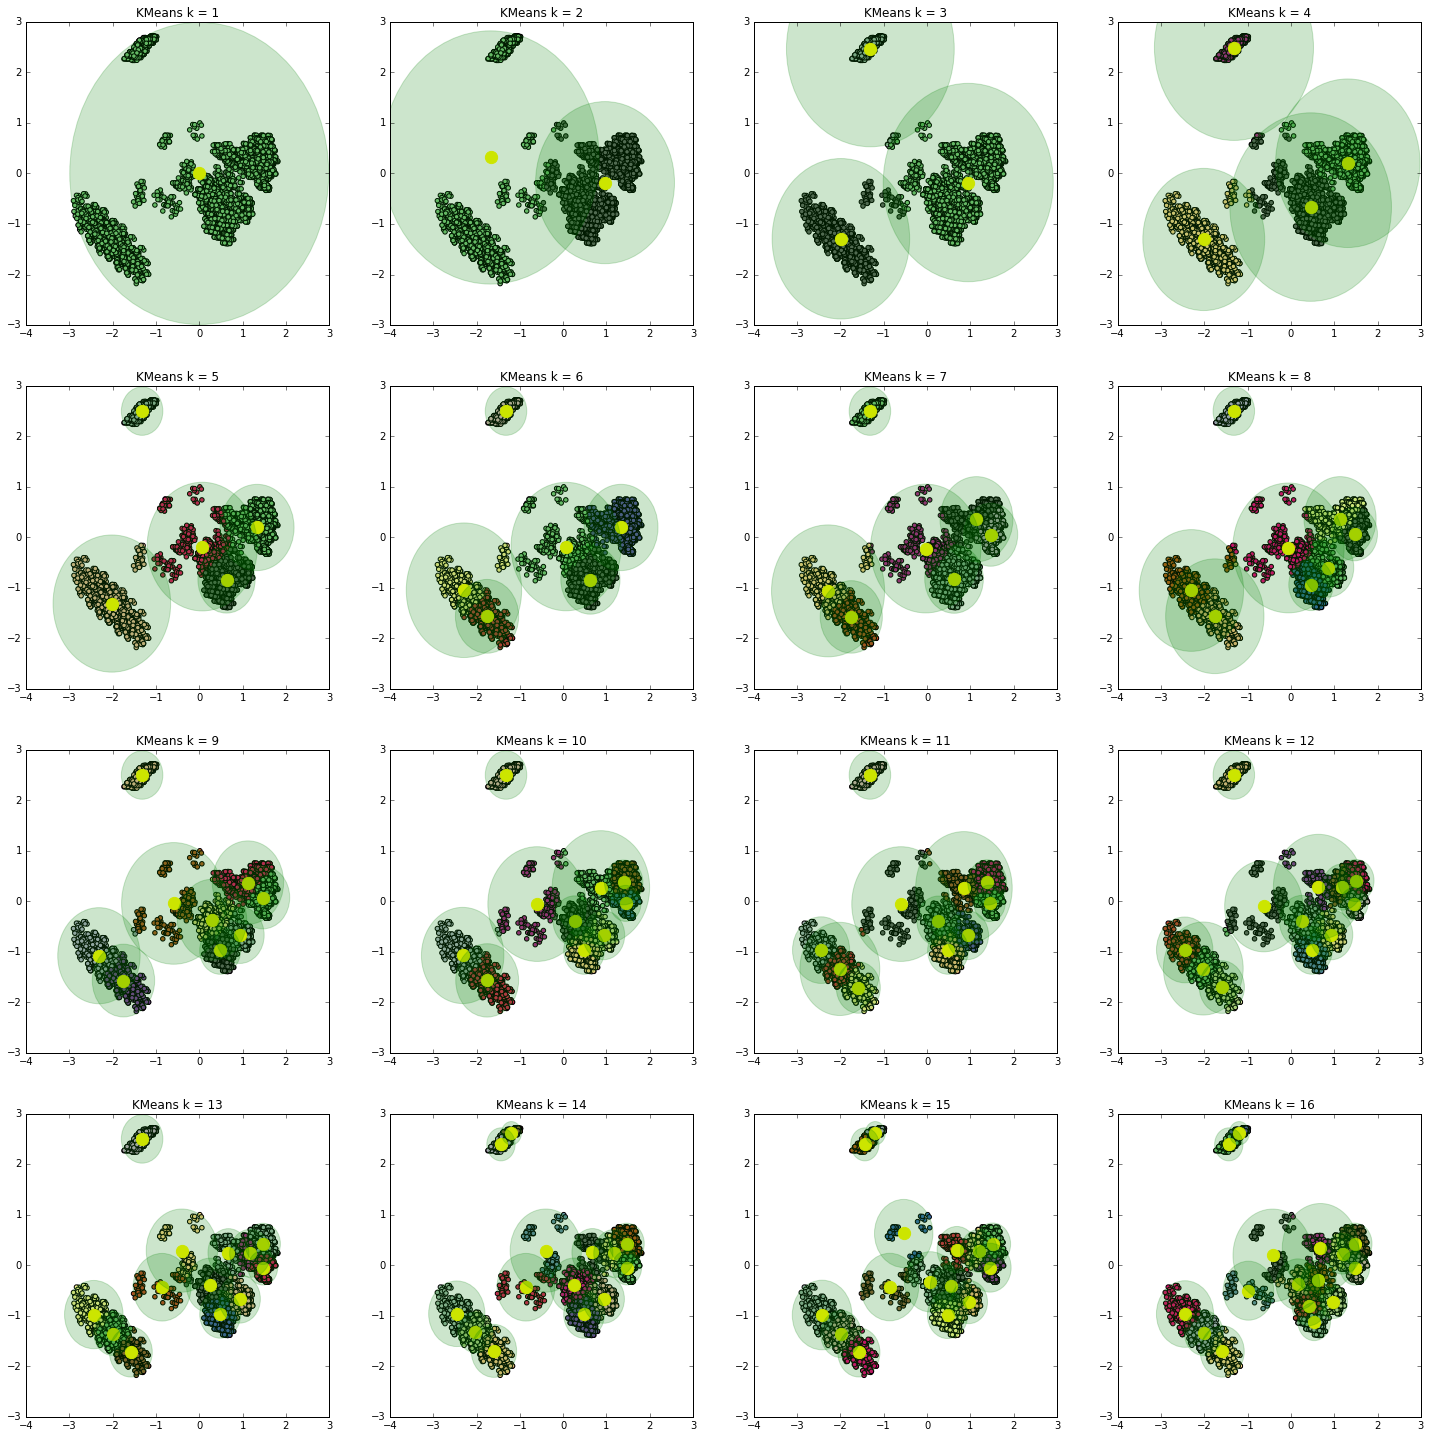

In [16]:
### P3 ###
def P3(components, clusters_num):
### STUDENT START ###
    
    #initialize
    pca = PCA(n_components= components)
    
    #fit PCA on training data
    pca.fit(train_data)
    
    #transform training data
    T_train_data = pca.transform(train_data)
    
    plt.figure(figsize=(25,25))
   
    for k in range (0, clusters_num):
        #perform Kmeans algo 
        km = KMeans(n_clusters= k + 1, init='k-means++')

        #Fit on PCA transformed training data
        clusters = km.fit(T_train_data) 

        #determine which subplot location to fill
        plt.subplot(4, 4, k + 1)
        
        #create a title
        plt.title('KMeans k = %d' %(k + 1), y = 1.0)

        
        #plot clusters and color by label index
        plt.scatter(T_train_data[:,0], T_train_data[:,1], c=clusters.labels_, cmap='Accent')

        #plot centroids
        plt.scatter(clusters.cluster_centers_[:,0], clusters.cluster_centers_[:,1], color='yellow', s = 150)

        # Calculate the furtherst point from each centroid and plot range
        for x in range(0, clusters.cluster_centers_.shape[0]):
            # Euclidian distance Distance
            dist = np.linalg.norm(T_train_data[clusters.labels_ == x] - clusters.cluster_centers_[x], axis=1)
            # maximum range
            r = dist.max()
            # Add circle to each centroid by maximum range
            plt.gcf().gca().add_artist(plt.Circle(xy=(clusters.cluster_centers_[x,0], clusters.cluster_centers_[x,1]), 
                                    radius=r, color='green', alpha=0.2))
            
### STUDENT END ###
P3(2, 16)

C:\Users\syc\Anaconda3\lib\site-packages\matplotlib\contour.py:1538: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


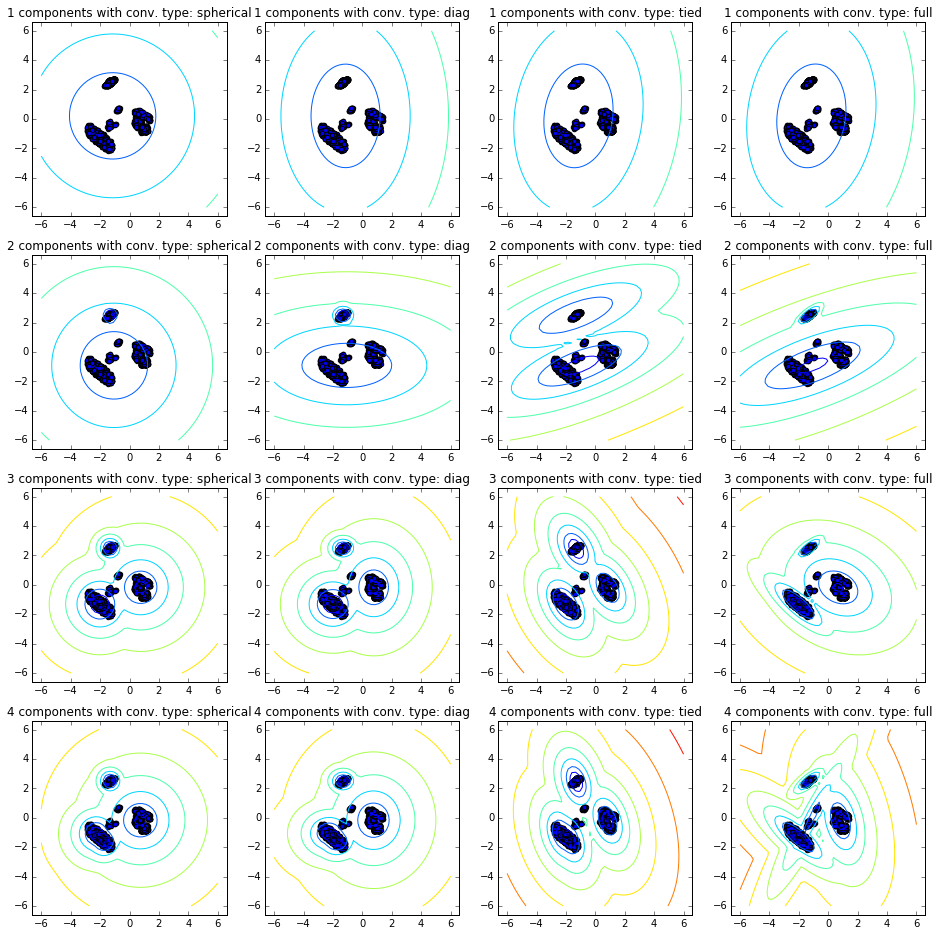

In [21]:
### P4 ###
def P4(components):
### STUDENT START ##
    fig, axes = plt.subplots(nrows=4, ncols=4, sharex=False, sharey=False, figsize = (16, 16))

    #initialize
    pca = PCA(n_components= components)
    
    #fit PCA on training data
    pca.fit(train_data)
    
    #transform training data
    T_train_data = pca.transform(train_data)
    
    #covariance matrix types
    cov_matrix = ['spherical','diag','tied','full']
    
    #Select only training data that is labeled as positive
    pos_labels = T_train_data[train_labels==1]
    
    #For 1-4 GMM components
    for i in range(0, 4):
        #For each covariance matrix type
        for idx, content in enumerate(cov_matrix):
            #Fit a GMM with i components and covariance matrix j for the positive examples
            gmm = GMM(n_components=(i+1), covariance_type = content)            
            gmm.fit(pos_labels)

            #Plot the training data by scatter spot 
            ax = axes[i, idx]
            ax.scatter (pos_labels[:,0], pos_labels[:,1])

            # display predicted scores by contour plot
            x = np.linspace(-6.0, 6.0)
            y = np.linspace(-6.0, 6.0)
            X, Y = np.meshgrid(x, y)
            XX = np.array([X.ravel(), Y.ravel()]).T
            Z = -gmm.score_samples(XX)[0]
            Z = Z.reshape(X.shape)
            CS = ax.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0), levels=np.logspace(0, 3, 10))

            #Title
            ax.set_title (str(i+1) + " components with conv. type: " + cov_matrix[idx], y = 1.0)

### STUDENT END ###

P4(2)



In [25]:
### P5 ###
def P5(components, cov_matrix, gmm_components):
    pca = PCA(n_components = components)
    T_train_data = pca.fit_transform(train_data)
    T_test_data = pca.transform(test_data)
    
    pos = []
    neg = []
    for i in range(len(train_labels)):
        if train_labels[i] == 0:
            neg.append(T_train_data[i])
        else:
            pos.append(T_train_data[i])
    
    clf_pos = GMM(n_components=gmm_components, covariance_type=cov_matrix)
    clf_pos.fit(pos)
    clf_neg = GMM(n_components=gmm_components, covariance_type=cov_matrix)
    clf_neg.fit(neg)
    correct = 0.
    for i in range(len(test_labels)):
        pos_score = clf_pos.score([T_test_data[i]])[0]
        neg_score = clf_neg.score([T_test_data[i]])[0]
        if pos_score >= neg_score:
            if test_labels[i] == 1:
                correct += 1
        else:
            if test_labels[i] == 0:
                correct += 1
            
    accuracy = correct / len(test_labels)
    print("Accuracy is %.4f." %accuracy)

P5(2, "full", 4)  
    
    
    
    

Accuracy is 0.9511.


In [30]:
### P6 ###

def P5(components, cov_matrix, gmm_components):
    pca = PCA(n_components = components)
    T_train_data = pca.fit_transform(train_data)
    T_test_data = pca.transform(test_data)
    
    pos = []
    neg = []
    for i in range(len(train_labels)):
        if train_labels[i] == 0:
            neg.append(T_train_data[i])
        else:
            pos.append(T_train_data[i])
    
    clf_pos = GMM(n_components=gmm_components, covariance_type=cov_matrix)
    clf_pos.fit(pos)
    clf_neg = GMM(n_components=gmm_components, covariance_type=cov_matrix)
    clf_neg.fit(neg)
    correct = 0.
    for i in range(len(test_labels)):
        pos_score = clf_pos.score([T_test_data[i]])[0]
        neg_score = clf_neg.score([T_test_data[i]])[0]
        if pos_score >= neg_score:
            if test_labels[i] == 1:
                correct += 1
        else:
            if test_labels[i] == 0:
                correct += 1
            
    accuracy = correct / len(test_labels)
    return accuracy


def num_parameters(components, gmm_components, cov_matrix):
        if cov_matrix == 'spherical':
            return (components + 1) * gmm_components * 2
        elif cov_matrix == 'diag':
            return (components + components) * gmm_components * 2
        elif cov_matrix == 'tied':
            return (components* gmm_components + components * (components - 1)/2) * 2
        else: 
            return (components + (components * (components + 1) / 2)) * gmm_components * 2 

def P6():
    results = []
    for components in range(1, 21):
        for gmm_components in range(1, 21):
            for cov_matrix in ['spherical', 'diag', 'tied', 'full']:
                variables = num_parameters(components, gmm_components, cov_matrix)
                if variables > 50: 
                    continue
                
                results.append((components, gmm_components, cov_matrix, P5(components, cov_matrix, gmm_components)))
    print("The best solution is with %d PCA components, %d GMM components, %s covariance type. Score: %.4f" % max(results, key=lambda x: x[3]))
    
P6()

The best solution is with 5 PCA components, 3 GMM components, tied covariance type. Score: 0.9760
